In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from numpy.linalg import eig, norm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
# fileName = 'cifar-10-python.tar.gz'


# #Function to unzip the data file
# import pickle

# def unpickle(file):
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict


# import gzip
# import shutil
# with gzip.open(fileName, 'rb') as f_in:
#     with open('file.txt', 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

# files = unpickle(fileName)

In [3]:
# Dataset directly downloaded through TensorFlow

from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = cifar10.load_data()

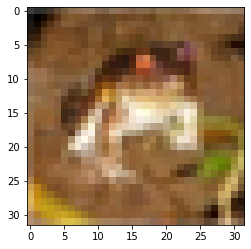

In [5]:
#Example of what the data images look like
#Belongs to class 6 - Frog
plt.imshow(X_train[0])
plt.show()

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
X_train.shape

(50000, 32, 32, 3)

#Q0

#Q1

In [8]:
# One-hot encoding of y-values
#This makes them categorical
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(y_train)

y_train_ohe = ohe.transform(y_train)
y_test_ohe = ohe.transform(y_test)

# Checking the first 5 values to see if it encoded correctly
y_train_ohe[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [9]:
# Encoded values match with original y_train
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
#Encoded values are trueOUTn
trueOUT_train = y_train_ohe
trueOUT_test = y_test_ohe

In [11]:
featuresLength = X_train.shape[1]*X_train.shape[2]*3
featuresLength

3072

In [12]:
# Example of observation before flattening
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [13]:
#Reshaping the data
X_train = X_train.reshape(X_train.shape[0], featuresLength)
X_test = X_test.reshape(X_test.shape[0], featuresLength)

In [14]:
# Same observation after flattening
X_train[0]

array([ 59,  62,  63, ..., 123,  92,  72], dtype=uint8)

In [15]:
X_train.shape

(50000, 3072)

In [16]:
# # change the the type of the data set
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255

In [17]:
# # Convert target classes to categorical ones
# Y_train = to_categorical(Y_train, num_classes)
# Y_test = to_categorical(Y_test, num_classes)

In [18]:
from tensorflow.keras.layers import Activation
import tensorflow as tf

In [19]:
#make MLP
h= featuresLength/2 #h=k or h=k/2

input = tf.keras.Input(shape= featuresLength)
hidden1 = Dense(h, activation  = 'relu')(input)
output = Dense(10, activation = 'softmax')(hidden1)

MLP1 = tf.keras.Model(input, output)
Hidden = tf.keras.Model(input, hidden1)

In [20]:
featuresLength/2

1536.0

In [21]:
# #make MLP
# #h= featuresLength/2 #h=k or h=k/2

# input = tf.keras.Input(shape= featuresLength)
# hidden1 = Dense(X_train.shape[0]/50, activation  = 'relu')(input)
# output = Dense(10, activation = 'softmax')(hidden1)

# MLP1 = tf.keras.Model(input, output)
# Hidden = tf.keras.Model(input, hidden1)

In [22]:
batch = int(X_train.shape[0]/50)
batch

1000

In [23]:

MLP1.compile(loss = 'CategoricalCrossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = MLP1.fit(X_train, trueOUT_train, epochs=10, batch_size = batch, verbose = 1, validation_data = (X_test, trueOUT_test))

Epoch 1/10
50/50 [==============================] - 39s 738ms/step - loss: 878.2714 - accuracy: 0.1469 - val_loss: 17.6158 - val_accuracy: 0.2025
Epoch 2/10
50/50 [==============================] - 19s 373ms/step - loss: 6.7746 - accuracy: 0.2005 - val_loss: 4.3863 - val_accuracy: 0.2053
Epoch 3/10
50/50 [==============================] - 19s 373ms/step - loss: 3.7745 - accuracy: 0.2255 - val_loss: 2.6378 - val_accuracy: 0.1837
Epoch 4/10
43/50 [========================>.....] - ETA: 2s - loss: 2.3332 - accuracy: 0.1116

KeyboardInterrupt: ignored

In [ ]:
#MLP1.predict_proba()

In [ ]:
history.history

In [ ]:
#Loss Function
# def Loss(m):
#   return history.history['loss'][m]

# history.history['loss']

In [ ]:
print(history.history.keys())

#Acuracy graph not required?
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Averaged crossentropy for each epoch
history.history['loss']

#Q2

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
#Center and Rescale input vectors?
#First going to combine x_train and X_test
X1 = pd.DataFrame(X_train)
X2 = pd.DataFrame(X_test)
X = pd.concat([X1, X2])
X

In [ ]:
# #TOOK 25 MINUTES
# #Need to make X scaled first
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(X)
# x_scaled = scaler.transform(X)
# X_scaled = pd.DataFrame(scaler.transform(X))
# CORR = X_scaled.corr()

In [ ]:
# #Compute eigen values and vectors from CORR
# eigenvalues, eigenvectors = eig(CORR)

# #L = eigenvalues
# #W = eigenvectors
# eigenvectors

In [ ]:
# #Compute PEV(m) with for loop
# #PEV(m) = (L1+....+Lm)/995
# PEV = [] #will hold the PEV values
# for m in range(featuresLength):
#   pevVal = sum(eigenvalues[0:(m+1)])/featuresLength
#   PEV.append(pevVal)

# #Scree plot for cumulative PVE vs PC
# #sns.set_theme(style="darkgrid")
# sns.lineplot(y = PEV, x = range(1,featuresLength+1), color = "blue")
# plt.plot([0,featuresLength],[0.9,0.9], color = "red")

# plt.title("Proportion of Variance Explained")
# plt.xlabel("Principle Components")
# plt.ylabel("PVE")

In [ ]:
# #Need to get the h_low value

# #Not sure if sorting eignenvalues is necessary
# #Sort eigenvalues
# eigenvalues = np.sort(eigenvalues)[::-1] #Sorts the eigenvalues in decreasing order
# index = np.argsort(-eigenvalues) #Index for the sorted eigenvalues

# #Compute the smallest integer h so that PEV(r)>=90%
# #h_low = 103
# for i in range(0,200):
#   if (PEV[i] >= 0.9):
#     print('The smallest integer h so that PEV(r)>=90% is:', i + 1)
#     h_low = i+1
#     break

In [ ]:
#To skip doing PEV Calculations
h_low = 103

In [ ]:
#Not sure what this is for
Hid=Hidden(X_train).numpy()
Hid.shape

In [ ]:
Hid

In [ ]:
#PCA
from sklearn.decomposition import PCA
#pca = PCA(n_components=0.9, svd_solver='full')
pca = PCA(n_components = h_low)
#X_train_pca=pca.fit_transform(Hid,)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
#Automatic Learning
h= h_low

input = tf.keras.Input(shape= (h_low,))
hidden1 = Dense(h_low, activation  = 'relu')(input)
output = Dense(10, activation = 'softmax')(hidden1)

MLP1 = tf.keras.Model(input, output)
Hidden = tf.keras.Model(input, hidden1)

In [ ]:
#Only took 1 minute!
MLP1.compile(loss = 'CategoricalCrossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = MLP1.fit(X_train_pca, trueOUT_train, epochs=50, batch_size = 100, verbose = 1, validation_data = (X_test_pca, trueOUT_test))

In [ ]:
print(history.history.keys())

#Acuracy graph not required?
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Larger view of graph
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Finding mSTOP
from tensorflow.keras.callbacks import EarlyStopping
custom_early_stopping = EarlyStopping(
    monitor='loss', 
    min_delta=0.01, 
    patience = 3,
    mode = 'auto'
)

input = tf.keras.Input(shape= (h_low,))
hidden1 = Dense(h_low, activation  = 'relu')(input)
output = Dense(10, activation = 'softmax')(hidden1)

MLP_low = tf.keras.Model(input, output)
Hidden = tf.keras.Model(input, hidden1)

MLP_low.compile(loss = 'CategoricalCrossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_low = MLP_low.fit(X_train_pca, trueOUT_train, epochs=50, batch_size = 100, verbose = 1, validation_data = (X_test_pca, trueOUT_test), callbacks=[custom_early_stopping])


plt.plot(history_low.history['accuracy'])
plt.plot(history_low.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history_low.history['loss'])
plt.plot(history_low.history['val_loss'])
plt.title('loss function')
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
mSTOP = len(history_low.history['loss'])
print(mSTOP)

In [ ]:
# Model prediction on training dataset
predict_train = MLP_low(X_train_pca)
Prediction_train=np.argmax(predict_train, axis=1)
Prediction_train

conf_mat_train = tf.math.confusion_matrix(Prediction_train, y_train_orig)
conf_mat_train

# Confusion matrix of accuracy on training data
acc_conf_mat_train = np.ndarray(0)
for i in range(len(conf_mat_train.numpy())):
  j = conf_mat_train.numpy()[i]/sum(conf_mat_train.numpy()[i])
  j = np.round(j,2)
  acc_conf_mat_train = np.append(acc_conf_mat_train,j)
acc_conf_mat_train.reshape(10,10)

In [ ]:
# Model prediction on test dataset
predict_test = MLP_low(X_test_pca)
Prediction_test=np.argmax(predict_test, axis=1)
Prediction_test

conf_mat_test = tf.math.confusion_matrix(Prediction_test, y_test_orig)
conf_mat_test

# Confusion matrix of accuracy on test data
acc_conf_mat_test = np.ndarray(0)
for i in range(len(conf_mat_test.numpy())):
  j = conf_mat_test.numpy()[i]/sum(conf_mat_test.numpy()[i])
  j = np.round(j,2)
  acc_conf_mat_test = np.append(acc_conf_mat_test,j)
acc_conf_mat_test.reshape(10,10)

In [ ]:
#^ Is the best epoch around 5?

In [ ]:
#StabTrain


In [ ]:
#MinTest

In [ ]:
#SafeZone

In [ ]:
#SafeMinTest

In [ ]:
#m = mSTOP
#MLP_low

#Q3

In [ ]:
#Function to seperate into classes:
def getClass(y_data, X_data, oneHot):
  temp = y_data[:] == oneHot
  a = []
  for i in temp:
    a.append(i.all())
  return X_data[a]


In [ ]:
#Function to combine train and test
def combineData(train, test):
  x1 = pd.DataFrame(train)
  x2 = pd.DataFrame(test)
  X = pd.concat([x1, x2])
  return X

In [ ]:
#Function to get entire class data
def getClassData(X_train, y_train, X_test, y_test, oneHot):
  #Function to seperate into classes:
  def getClass(y_data, X_data, oneHot):
    temp = y_data[:] == oneHot
    a = []
    for i in temp:
      a.append(i.all())
    return X_data[a]
  #Function to combine train and test
  def combineData(train, test):
    x1 = pd.DataFrame(train)
    x2 = pd.DataFrame(test)
    X = pd.concat([x1, x2])
    return X
  return combineData(getClass(y_train,X_train, oneHot), getClass(y_test, X_test, oneHot))



In [ ]:
#Define what classes are
CL1_label =  [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
CL2_label =  [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]
CL3_label =  [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]
CL4_label =  [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]
CL5_label =  [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]
CL6_label =  [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
CL7_label =  [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]
CL8_label =  [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]
CL9_label =  [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]
CL10_label =  [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]

In [ ]:
#Going to seperate the data into classes first
CL1 = getClassData(X_train, trueOUT_train, X_test, trueOUT_test, CL1_label)
CL2 = getClassData(X_train, trueOUT_train, X_test, trueOUT_test, CL2_label)
CL3 = getClassData(X_train, trueOUT_train, X_test, trueOUT_test, CL3_label)
CL4 = getClassData(X_train, trueOUT_train, X_test, trueOUT_test, CL4_label)
CL5 = getClassData(X_train, trueOUT_train, X_test, trueOUT_test, CL5_label)
CL6 = getClassData(X_train, trueOUT_train, X_test, trueOUT_test, CL6_label)
CL7 = getClassData(X_train, trueOUT_train, X_test, trueOUT_test, CL7_label)
CL8 = getClassData(X_train, trueOUT_train, X_test, trueOUT_test, CL8_label)
CL9 = getClassData(X_train, trueOUT_train, X_test, trueOUT_test, CL9_label)
CL10 = getClassData(X_train, trueOUT_train, X_test, trueOUT_test, CL10_label)

In [ ]:
from sklearn import preprocessing

In [ ]:
#Function for getting h:
def getPEV(X):
  #Need to make X scaled first
  scaler = preprocessing.StandardScaler().fit(X)
  x_scaled = scaler.transform(X)
  X_scaled = pd.DataFrame(scaler.transform(X))
  CORR = X_scaled.corr()

  #Compute eigen values and vectors from CORR
  eigenvalues, eigenvectors = eig(CORR)

  #L = eigenvalues
  #W = eigenvectors
  eigenvectors

  #Compute PEV(m) with for loop
  #PEV(m) = (L1+....+Lm)/995
  PEV = [] #will hold the PEV values
  for m in range(featuresLength):
    pevVal = sum(eigenvalues[0:(m+1)])/featuresLength
    PEV.append(pevVal)

  #Need to get the h_low value

  #Not sure if sorting eignenvalues is necessary
  #Sort eigenvalues
  eigenvalues = np.sort(eigenvalues)[::-1] #Sorts the eigenvalues in decreasing order
  index = np.argsort(-eigenvalues) #Index for the sorted eigenvalues

  #Compute the smallest integer h so that PEV(r)>=90%
  #h_low = 103
  for i in range(3072):
    if (PEV[i] >= 0.9):
      #print('The smallest integer h so that PEV(r)>=90% is:', i + 1)
      h = i+1
      break

  return h, PEV

## PVE Graphs for CL1 - CL10

In [ ]:
#Took only 3 min
#PCA Analysis for CL1

#Get PEV and h value
h1, PEV1 = getPEV(CL1)



In [ ]:
#Scree plot for cumulative PVE vs PC
#sns.set_theme(style="darkgrid")
sns.lineplot(y = PEV1, x = range(1,featuresLength+1), color = "blue")
plt.plot([0,featuresLength],[0.9,0.9], color = "red")

plt.title("Proportion of Variance Explained for CL1")
plt.xlabel("Principle Components")
plt.ylabel("PVE")
plt.show()

print('The smallest integer h1 so that PEV(r)>=90% is:', h1)

In [ ]:
#PCA Analysis for CL2
#took 3 min
#Get PEV and h value
h2, PEV2 = getPEV(CL2)

In [ ]:
#Scree plot for cumulative PVE vs PC
#sns.set_theme(style="darkgrid")
sns.lineplot(y = PEV2, x = range(1,featuresLength+1), color = "blue")
plt.plot([0,featuresLength],[0.9,0.9], color = "red")

plt.title("Proportion of Variance Explained for CL2")
plt.xlabel("Principle Components")
plt.ylabel("PVE")
plt.show()

print('The smallest integer h2 so that PEV(r)>=90% is:', h2)

In [ ]:
#PCA Analysis for CL3
#took 3 min
#Get PEV and h value
h3, PEV3 = getPEV(CL3)

In [ ]:
#Scree plot for cumulative PVE vs PC
#sns.set_theme(style="darkgrid")
sns.lineplot(y = PEV3, x = range(1,featuresLength+1), color = "blue")
plt.plot([0,featuresLength],[0.9,0.9], color = "red")

plt.title("Proportion of Variance Explained for CL3")
plt.xlabel("Principle Components")
plt.ylabel("PVE")
plt.show()

print('The smallest integer h3 so that PEV(r)>=90% is:', h3)

In [ ]:
#PCA Analysis for CL4
#took 3 min
#Get PEV and h value
h4, PEV4 = getPEV(CL4)

In [ ]:
#Scree plot for cumulative PVE vs PC
#sns.set_theme(style="darkgrid")
sns.lineplot(y = PEV4, x = range(1,featuresLength+1), color = "blue")
plt.plot([0,featuresLength],[0.9,0.9], color = "red")

plt.title("Proportion of Variance Explained for CL4")
plt.xlabel("Principle Components")
plt.ylabel("PVE")
plt.show()

print('The smallest integer h4 so that PEV(r)>=90% is:', h4)

In [ ]:
#PCA Analysis for CL5
#took 3 min
#Get PEV and h value
h5, PEV5 = getPEV(CL5)

In [ ]:
#Scree plot for cumulative PVE vs PC
#sns.set_theme(style="darkgrid")
sns.lineplot(y = PEV5, x = range(1,featuresLength+1), color = "blue")
plt.plot([0,featuresLength],[0.9,0.9], color = "red")

plt.title("Proportion of Variance Explained for CL5")
plt.xlabel("Principle Components")
plt.ylabel("PVE")
plt.show()

print('The smallest integer h5 so that PEV(r)>=90% is:', h5)

In [ ]:
#PCA Analysis for CL6
#took 3 min
#Get PEV and h value
h6, PEV6 = getPEV(CL6)

In [ ]:
#Scree plot for cumulative PVE vs PC
#sns.set_theme(style="darkgrid")
sns.lineplot(y = PEV6, x = range(1,featuresLength+1), color = "blue")
plt.plot([0,featuresLength],[0.9,0.9], color = "red")

plt.title("Proportion of Variance Explained for CL6")
plt.xlabel("Principle Components")
plt.ylabel("PVE")
plt.show()

print('The smallest integer h6 so that PEV(r)>=90% is:', h6)

In [ ]:
#PCA Analysis for CL7
#took 3 min
#Get PEV and h value
h7, PEV7 = getPEV(CL7)

In [ ]:
#Scree plot for cumulative PVE vs PC
#sns.set_theme(style="darkgrid")
sns.lineplot(y = PEV7, x = range(1,featuresLength+1), color = "blue")
plt.plot([0,featuresLength],[0.9,0.9], color = "red")

plt.title("Proportion of Variance Explained for CL7")
plt.xlabel("Principle Components")
plt.ylabel("PVE")
plt.show()

print('The smallest integer h7 so that PEV(r)>=90% is:', h7)

In [ ]:
#PCA Analysis for CL8
#took 3 min
#Get PEV and h value
h8, PEV8 = getPEV(CL8)

In [ ]:
#Scree plot for cumulative PVE vs PC
#sns.set_theme(style="darkgrid")
sns.lineplot(y = PEV8, x = range(1,featuresLength+1), color = "blue")
plt.plot([0,featuresLength],[0.9,0.9], color = "red")

plt.title("Proportion of Variance Explained for CL8")
plt.xlabel("Principle Components")
plt.ylabel("PVE")
plt.show()

print('The smallest integer h8 so that PEV(r)>=90% is:', h8)

In [ ]:
#PCA Analysis for CL9
#took 3 min
#Get PEV and h value
h9, PEV9 = getPEV(CL9)

In [ ]:
#Scree plot for cumulative PVE vs PC
#sns.set_theme(style="darkgrid")
sns.lineplot(y = PEV9, x = range(1,featuresLength+1), color = "blue")
plt.plot([0,featuresLength],[0.9,0.9], color = "red")

plt.title("Proportion of Variance Explained for CL9")
plt.xlabel("Principle Components")
plt.ylabel("PVE")
plt.show()

print('The smallest integer h9 so that PEV(r)>=90% is:', h9)

In [ ]:
#PCA Analysis for CL10
#took 3 min
#Get PEV and h value
h10, PEV10 = getPEV(CL10)

In [ ]:
#Scree plot for cumulative PVE vs PC
#sns.set_theme(style="darkgrid")
sns.lineplot(y = PEV10, x = range(1,featuresLength+1), color = "blue")
plt.plot([0,featuresLength],[0.9,0.9], color = "red")

plt.title("Proportion of Variance Explained for CL10")
plt.xlabel("Principle Components")
plt.ylabel("PVE")
plt.show()

print('The smallest integer h10 so that PEV(r)>=90% is:', h10)

In [ ]:
#Scree plot for cumulative PVE vs PC
#sns.set_theme(style="darkgrid")
sns.lineplot(y =PEV1, x = range(1,featuresLength+1))
sns.lineplot(y =PEV2, x = range(1,featuresLength+1))
sns.lineplot(y =PEV3, x = range(1,featuresLength+1))
sns.lineplot(y =PEV4, x = range(1,featuresLength+1))
sns.lineplot(y =PEV5, x = range(1,featuresLength+1))
sns.lineplot(y =PEV6, x = range(1,featuresLength+1))
sns.lineplot(y =PEV7, x = range(1,featuresLength+1))
sns.lineplot(y =PEV8, x = range(1,featuresLength+1))
sns.lineplot(y =PEV9, x = range(1,featuresLength+1))
sns.lineplot(y = PEV10, x = range(1,featuresLength+1))
plt.plot([0,featuresLength],[0.9,0.9], color = "red")

plt.title("Proportion of Variance Explained for All Classes")
plt.xlabel("Principle Components")
plt.ylabel("PVE")
plt.show()


## PCA Using h_high

In [ ]:
#Define H_high
h_high = h1+h2+h3+h4+h5+h6+h7+h8+h9+h10
h_high

In [ ]:
h_high = 1028

In [ ]:
#PCA
#takes 2 min
from sklearn.decomposition import PCA
#pca = PCA(n_components=0.9, svd_solver='full')
pca = PCA(n_components = h_high)
#X_train_pca=pca.fit_transform(Hid,)
X_train_pca_high = pca.fit_transform(X_train)
X_test_pca_high = pca.transform(X_test)

In [ ]:
#Automatic Learning

input = tf.keras.Input(shape= (h_high,))
hidden1 = Dense(h_high, activation  = 'relu')(input)
output = Dense(10, activation = 'softmax')(hidden1)

MLP1 = tf.keras.Model(input, output)
Hidden = tf.keras.Model(input, hidden1)

In [ ]:
#Took 7 min
MLP1.compile(loss = 'CategoricalCrossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = MLP1.fit(X_train_pca_high, trueOUT_train, epochs=50, batch_size = 100, verbose = 1, validation_data = (X_test_pca_high, trueOUT_test))

In [ ]:
print(history.history.keys())

#Acuracy graph not required?
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Finding mSTOP
from tensorflow.keras.callbacks import EarlyStopping
custom_early_stopping = EarlyStopping(
    monitor='loss', 
    min_delta=0.01, 
    patience = 3,
    mode = 'auto'
)

input = tf.keras.Input(shape= (h_high,))
hidden1 = Dense(h_high, activation  = 'relu')(input)
output = Dense(10, activation = 'softmax')(hidden1)

MLP_high = tf.keras.Model(input, output)
Hidden = tf.keras.Model(input, hidden1)

MLP_high.compile(loss = 'CategoricalCrossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_high = MLP_high.fit(X_train_pca_high, trueOUT_train, epochs=50, batch_size = 100, verbose = 1, validation_data = (X_test_pca_high, trueOUT_test), callbacks=[custom_early_stopping])

In [ ]:
plt.plot(history_high.history['accuracy'])
plt.plot(history_high.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history_high.history['loss'])
plt.plot(history_high.history['val_loss'])
plt.title('loss function')
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
mSTOP_high = len(history_high.history['loss'])
print(mSTOP_high)

In [ ]:
# Model prediction on training dataset
predict_train_high = MLP_high(X_train_pca_high)
Prediction_train_high=np.argmax(predict_train_high, axis=1)
Prediction_train_high

conf_mat_train_high = tf.math.confusion_matrix(Prediction_train_high, y_train_orig)
conf_mat_train_high

# Confusion matrix of accuracy on training data
acc_conf_mat_train_high = np.ndarray(0)
for i in range(len(conf_mat_train_high.numpy())):
  j = conf_mat_train_high.numpy()[i]/sum(conf_mat_train_high.numpy()[i])
  j = np.round(j,2)
  acc_conf_mat_train_high = np.append(acc_conf_mat_train_high,j)
acc_conf_mat_train_high.reshape(10,10)

In [ ]:
# Model prediction on test dataset
predict_test_high = MLP_low(X_test_pca_high)
Prediction_test_high=np.argmax(predict_test_high, axis=1)
Prediction_test_high

conf_mat_test_high = tf.math.confusion_matrix(Prediction_test_high, y_test_orig)
conf_mat_test_high

# Confusion matrix of accuracy on test data
acc_conf_mat_test_high = np.ndarray(0)
for i in range(len(conf_mat_test_high.numpy())):
  j = conf_mat_test_high.numpy()[i]/sum(conf_mat_test_high.numpy()[i])
  j = np.round(j,2)
  acc_conf_mat_test_high = np.append(acc_conf_mat_test,j)
acc_conf_mat_test_high.reshape(10,10)

#Q4

In [ ]:
#Just pasted this here to not have to run the one before w/graphs
#MLP_high
from tensorflow.keras.callbacks import EarlyStopping
custom_early_stopping = EarlyStopping(
    monitor='loss', 
    min_delta=0.01, 
    patience = 3,
    mode = 'auto'
)

input = tf.keras.Input(shape= (h_high,))
hidden1 = Dense(h_high, activation  = 'relu')(input)
output = Dense(10, activation = 'softmax')(hidden1)

MLP_high = tf.keras.Model(input, output)
Hidden = tf.keras.Model(input, hidden1)

MLP_high.compile(loss = 'CategoricalCrossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_high = MLP_high.fit(X_train_pca_high, trueOUT_train, epochs=50, batch_size = 100, verbose = 1, validation_data = (X_test_pca_high, trueOUT_test), callbacks=[custom_early_stopping])



In [ ]:
#Need to find h2

In [ ]:
Hid=Hidden(X_train_pca_high).numpy()
Hid.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, svd_solver='full')
Zn=pca.fit_transform(Hid,)
Zn.shape

In [ ]:
#Got h2 from PCA
h2 = 752

In [ ]:
#Construct auto encoder
#dimm of L2= h2, dimmL1 = dimmL3 = h_high
h_high = 1028

auto_input = tf.keras.Input(shape=(h_high,))
encoder = Dense(h2, activation='relu')(auto_input)
decoder = Dense(h_high, activation='linear')(encoder)

Autoencoder = tf.keras.Model(auto_input, decoder)
Encoder=tf.keras.Model(auto_input,encoder)

# Configure the model and start training
Autoencoder.compile(loss='mse', optimizer='adam', metrics=['mse'])
history1= Autoencoder.fit(Hid, Hid, epochs=20, batch_size=100, verbose=1, validation_data = (X_test_pca_high, X_test_pca_high)) #validation_split=0.2



In [ ]:
print(history1.history.keys())
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['TrainMSE', 'TestMSE'], loc='upper left')
plt.show()

In [ ]:
#Scaling the data
scaler = preprocessing.StandardScaler().fit(X)
x_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(scaler.transform(X))

#Q5

#Q6